## Forward Goldstein Taylor model

Consider the macroscopic formulation of Goldstein-Taylor model in discrete velocity kinetic theory, i.e.

$\partial_{t}\rho + \partial_{x}j = 0$

$\partial_{t}j + {(\frac{c}{\epsilon})}^2\partial_{x}\rho = - \frac{\sigma}{\epsilon^2}j$

with $x \in \mathbb{R}, t \geq 0,$

$\rho = \rho(x, t)$ total particles density, $j = j(x, t)$ scaled flux, 

$\epsilon$ scaling parameter of the kinetic dynamics and $\sigma$ scattering coefficient.

We will use the Euler IMEX scheme with centered finite differences in space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Euler_IMEX import solve_E_I # import the solver

Let $x \in [-1,1],\,\, t \in [0,0.1]$.

In [2]:
m = 400 # discretization for x
n = 4200 # discretization for t
x_disc = np.linspace(-1,1,m+1)
t_disc = np.linspace(0,0.1,n+1)
delta_x = (x_disc[-1] - x_disc[0])/(len(x_disc)-1)
delta_t = (t_disc[-1] - t_disc[0])/(len(t_disc)-1)
print(f"Δx = {delta_x}")
print(f"Δx**2 = {(delta_x)**2}")
print(f"Δt = {delta_t}")
if delta_t < delta_x**2:
    print("CFL condition satisfied")
else:
    print("CFL condition NOT satisifed, please change m and n values")

Δx = 0.005
Δx**2 = 2.5e-05
Δt = 2.380952380952381e-05
CFL condition satisfied


Let's consider the conditions of TEST 1 of paper

In [3]:
c = 1
sigma = 4
eps = 1e-4
rho_0 = 6+3*np.cos(3*np.pi*x_disc)
j_0 = (9*np.pi*(c**2)/sigma)*np.sin(3*np.pi*x_disc)

In [4]:
rho_tot, j_tot = solve_E_I(x_disc, t_disc, rho_0, j_0, eps, sigma, c)

Plot the solutions

In [14]:
T, X = np.meshgrid(t_disc, x_disc)

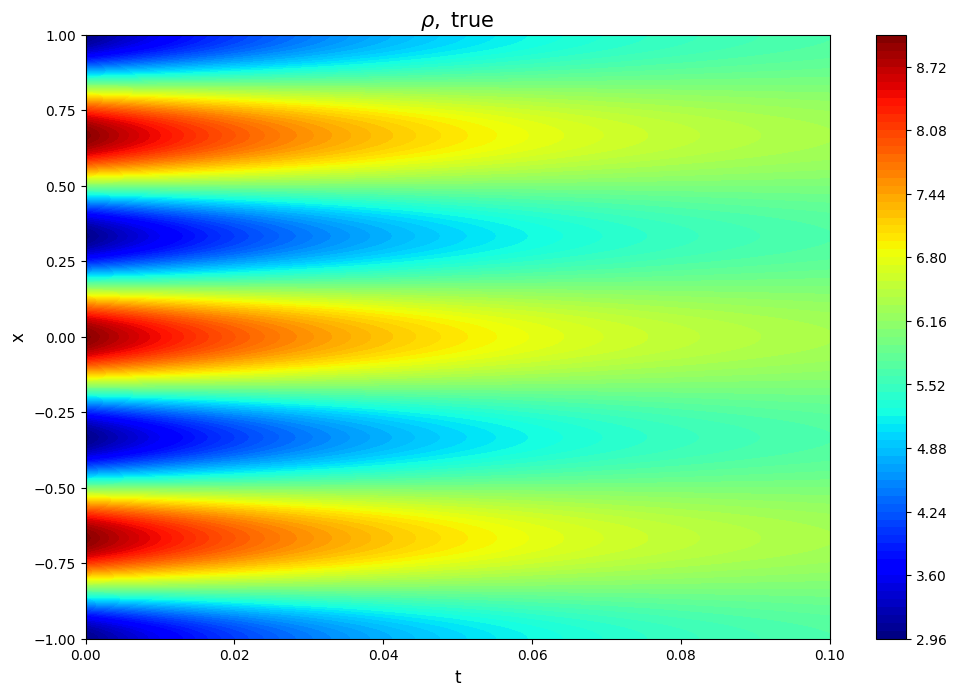

In [19]:
# rho
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.contourf(T, X, rho_tot, 80, cmap='jet')
plt.colorbar()
plt.title(r'$\rho,$ true',      
          fontsize="15", wrap=True)
plt.xlabel(r't', fontsize="12")
plt.ylabel(r'x', fontsize="12")  
plt.show()
fig.savefig('G_T_rho.jpg', dpi=300)

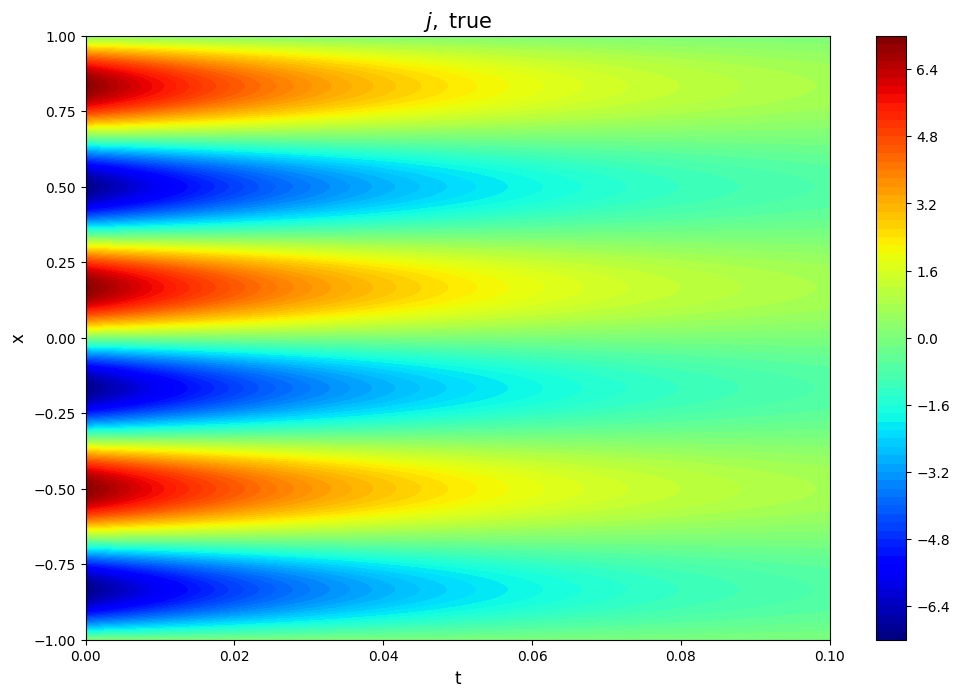

In [20]:
# j
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.contourf(T, X, j_tot, 80, cmap='jet')
plt.colorbar()
plt.title(r'$j,$ true',      
          fontsize="15", wrap=True)
plt.xlabel(r't', fontsize="12")
plt.ylabel(r'x', fontsize="12")  
plt.show()
fig.savefig('G_T_j.jpg', dpi=300)

Since

$\rho = f^+ + f^-$ and $j = \frac{c}{\epsilon}(f^+ - f^-),$

then we have that $\,f^- = \frac{1}{2}(\rho - \frac{\epsilon}{c}j)$ and $f^+ = \rho - f^-.$

In [21]:
f_minus_tot = 0.5*(rho_tot - (eps*j_tot)/c)
f_plus_tot = rho_tot - f_minus_tot

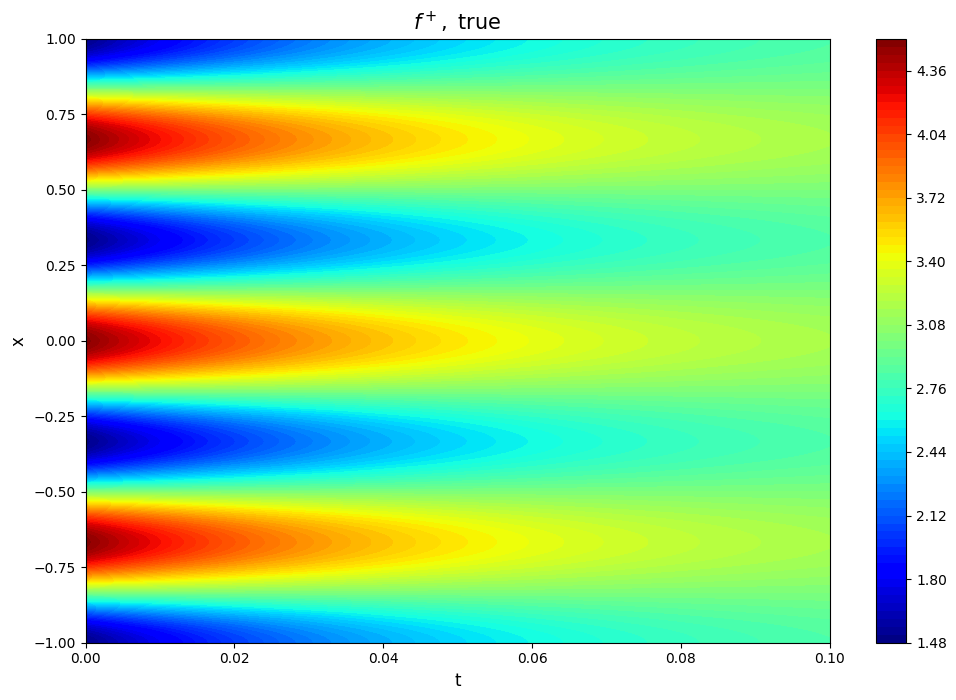

In [22]:
# f_plus
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.contourf(T, X, f_plus_tot, 80, cmap='jet')
plt.colorbar()
plt.title(r'$f^+,$ true',      
          fontsize="15", wrap=True)
plt.xlabel(r't', fontsize="12")
plt.ylabel(r'x', fontsize="12")  
plt.show()
fig.savefig('G_T_f_plus.jpg', dpi=300)

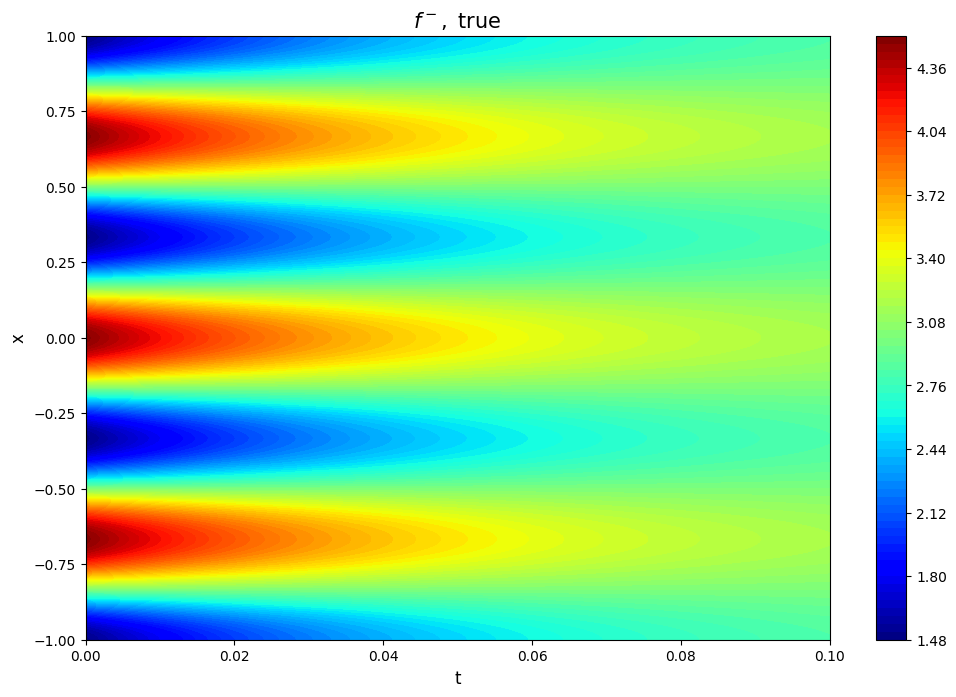

In [23]:
# f_minus
fig=plt.figure(figsize=(12,8), dpi= 100)
plt.contourf(T, X, f_plus_tot, 80, cmap='jet')
plt.colorbar()
plt.title(r'$f^-,$ true',      
          fontsize="15", wrap=True)
plt.xlabel(r't', fontsize="12")
plt.ylabel(r'x', fontsize="12")  
plt.show()
fig.savefig('G_T_f_minus.jpg', dpi=300)